In [1]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

In [2]:
csv_files = ["/Users/bikram/Downloads/BTC-2017min.csv", 
             "/Users/bikram/Downloads/BTC-2018min.csv",
            "/Users/bikram/Downloads/BTC-2019min.csv",
            "/Users/bikram/Downloads/BTC-2020min.csv",
            "BTC-2021min.csv"]

dfs = []

for file in csv_files:
    dfs.append(pd.read_csv(file))
    
df = pd.concat(dfs, ignore_index=True)

In [3]:
df.head(5)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


In [4]:
df.tail(5)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2675296,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
2675297,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
2675298,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
2675299,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279
2675300,1609459260,2021-01-01 00:01:00,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397


In [5]:
df.shape

(2675301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675301 entries, 0 to 2675300
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   unix        int64  
 1   date        object 
 2   symbol      object 
 3   open        float64
 4   high        float64
 5   low         float64
 6   close       float64
 7   Volume BTC  float64
 8   Volume USD  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 183.7+ MB


In [7]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.675301e+06,2.675301e+06,2.675301e+06,2.675301e+06,2.675301e+06,2.675301e+06,2.675301e+06
mean,1.564041e+09,1.620993e+04,1.621988e+04,1.619961e+04,1.620996e+04,6.130515e+00,7.079403e+04
std,4.707622e+07,1.742228e+04,1.743201e+04,1.741236e+04,1.742244e+04,1.629300e+01,2.030353e+05
min,1.483229e+09,7.520000e+02,7.528100e+02,7.513400e+02,7.520400e+02,0.000000e+00,0.000000e+00
25%,1.523358e+09,5.599040e+03,5.602000e+03,5.594980e+03,5.598880e+03,2.518954e-01,2.244546e+03
50%,1.563488e+09,8.703120e+03,8.709860e+03,8.696910e+03,8.702810e+03,1.467694e+00,1.466467e+04
75%,1.603618e+09,1.550000e+04,1.551000e+04,1.548793e+04,1.550000e+04,5.507826e+00,5.865908e+04
max,1.646106e+09,6.900000e+04,6.900000e+04,6.879999e+04,6.900000e+04,1.616060e+03,1.396792e+07


<p><b>Drop the column unix</b></p>

In [8]:
df = df.drop("unix", axis=1)

<p><b>Convert dates to datetime and format date to year-month-day</b></p>

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675301 entries, 0 to 2675300
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   symbol      object        
 2   open        float64       
 3   high        float64       
 4   low         float64       
 5   close       float64       
 6   Volume BTC  float64       
 7   Volume USD  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 163.3+ MB


#### Check for null values

In [11]:
df.isnull().any()

date          False
symbol        False
open          False
high          False
low           False
close         False
Volume BTC    False
Volume USD    False
dtype: bool

## EDA



### 2017 Analysis

<p><b>Extracting 2017 data</b></p>

In [12]:
df_2017 = df[(df['date']>="2017-01-01") & (df['date']<'2018-01-01')]
df_2017

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130
...,...,...,...,...,...,...,...,...
525594,2017-01-01 00:05:00,BTC/USD,966.43,966.43,966.43,966.43,0.107000,103.408010
525595,2017-01-01 00:04:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
525596,2017-01-01 00:03:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
525597,2017-01-01 00:02:00,BTC/USD,966.16,966.37,966.16,966.37,8.087376,7815.397864


<p><b>Sort the data by date in ascending order</b></p>

In [13]:
df_2017 = df_2017.sort_values(by="date")
df_2017

,date,symbol,open,high,low,close,Volume BTC,Volume USD
525598,2017-01-01 00:01:00,BTC/USD,966.34,966.34,966.34,966.34,7.610000,7353.847400
525597,2017-01-01 00:02:00,BTC/USD,966.16,966.37,966.16,966.37,8.087376,7815.397864
525596,2017-01-01 00:03:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
525595,2017-01-01 00:04:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
525594,2017-01-01 00:05:00,BTC/USD,966.43,966.43,966.43,966.43,0.107000,103.408010
...,...,...,...,...,...,...,...,...
4,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130
3,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
2,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
1,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658


<p><b> convert the numerical representation of months to their corresponding three-letter abbreviations (e.g., "Jan" for January) and store them in a new column called "month" for analysis. </b></p>

In [14]:
df_2017["month"] = df_2017['date'].dt.month
df_2017['month'] = df_2017['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df_2017

,date,symbol,open,high,low,close,Volume BTC,Volume USD,month
525598,2017-01-01 00:01:00,BTC/USD,966.34,966.34,966.34,966.34,7.610000,7353.847400,Jan
525597,2017-01-01 00:02:00,BTC/USD,966.16,966.37,966.16,966.37,8.087376,7815.397864,Jan
525596,2017-01-01 00:03:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000,Jan
525595,2017-01-01 00:04:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000,Jan
525594,2017-01-01 00:05:00,BTC/USD,966.43,966.43,966.43,966.43,0.107000,103.408010,Jan
...,...,...,...,...,...,...,...,...,...
4,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,Dec
3,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,Dec
2,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,Dec
1,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,Dec


<p><b>creating a bar graph comparing the open and close prices of the stock month-wise</b></p>

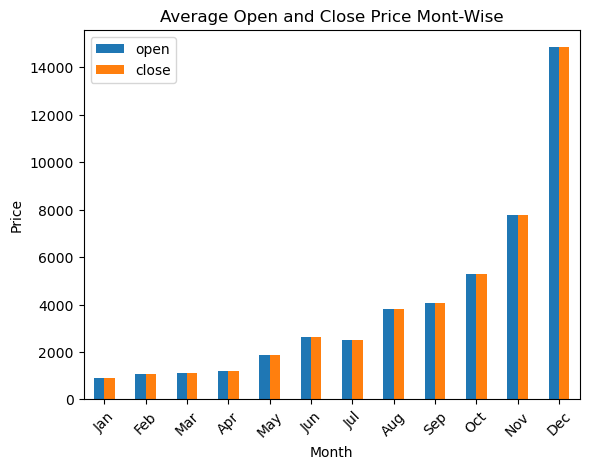

In [15]:
monthly_open_close_data = df_2017.groupby('month')[['open', 'close']].mean()
monthly_open_close_data = monthly_open_close_data.reindex(calendar.month_abbr[1:], axis=0)

monthly_open_close_data.plot(kind='bar')
plt.title("Average Open and Close Price Mont-Wise")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [16]:
df_2017.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,month
525598,2017-01-01 00:01:00,BTC/USD,966.34,966.34,966.34,966.34,7.610000,7353.847400,Jan
525597,2017-01-01 00:02:00,BTC/USD,966.16,966.37,966.16,966.37,8.087376,7815.397864,Jan
525596,2017-01-01 00:03:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000,Jan
525595,2017-01-01 00:04:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000,Jan
525594,2017-01-01 00:05:00,BTC/USD,966.43,966.43,966.43,966.43,0.107000,103.408010,Jan


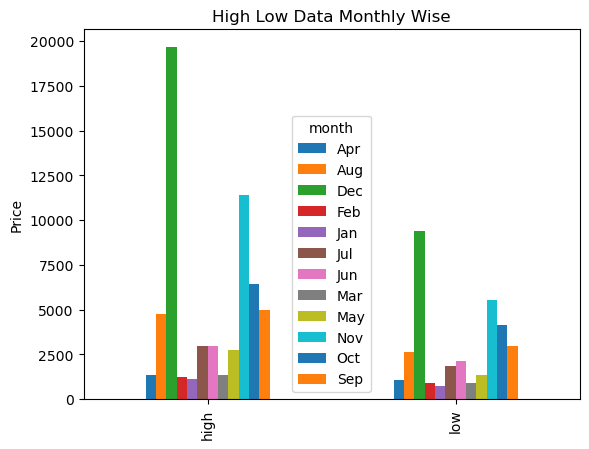

In [17]:
monthly_high_data = df_2017.groupby("month")["high"].max()
montly_low_data = df_2017.groupby("month")["low"].min()
monthly_high_low_data = pd.DataFrame([monthly_high_data, montly_low_data])
monthly_high_low_data.plot(kind="bar")
plt.title("High Low Data Monthly Wise")
plt.ylabel("Price")
plt.show()

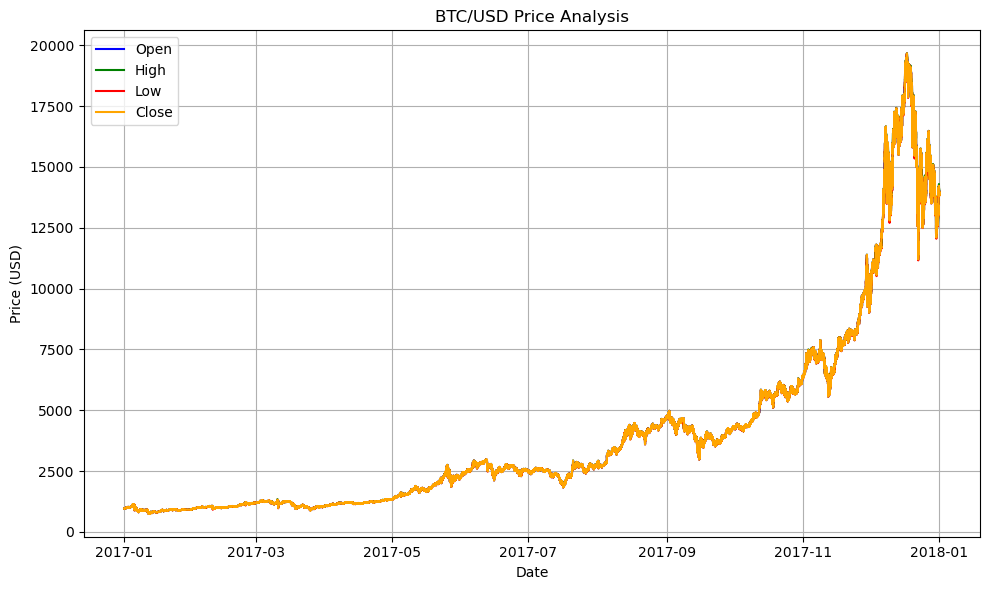

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(df_2017['date'], df_2017['open'], color='blue', label='Open')
plt.plot(df_2017['date'], df_2017['high'], color='green', label='High')
plt.plot(df_2017['date'], df_2017['low'], color='red', label='Low')
plt.plot(df_2017['date'], df_2017['close'], color='orange', label='Close')

plt.title('BTC/USD Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 2018 Analysis

In [19]:
df_2018 = df[(df['date']>="2018-01-01") & (df['date']<'2019-01-01')]
df_2018

,date,symbol,open,high,low,close,Volume BTC,Volume USD
525599,2018-12-31 23:59:00,BTC/USD,3689.26,3693.30,3689.26,3693.30,9.838855,36337.841473
525600,2018-12-31 23:58:00,BTC/USD,3689.26,3691.35,3689.26,3691.35,0.560000,2067.156000
525601,2018-12-31 23:57:00,BTC/USD,3688.83,3689.26,3688.83,3689.26,0.560833,2069.059602
525602,2018-12-31 23:56:00,BTC/USD,3687.87,3689.65,3686.92,3686.92,7.610240,28058.346208
525603,2018-12-31 23:55:00,BTC/USD,3688.28,3688.85,3685.00,3688.85,7.665703,28277.629729
...,...,...,...,...,...,...,...,...
1051193,2018-01-01 00:05:00,BTC/USD,13826.10,13826.10,13734.45,13737.93,38.030409,522459.100423
1051194,2018-01-01 00:04:00,BTC/USD,13823.19,13826.75,13803.20,13803.20,0.646691,8926.403003
1051195,2018-01-01 00:03:00,BTC/USD,13847.51,13874.92,13823.19,13823.19,1.155274,15969.574078
1051196,2018-01-01 00:02:00,BTC/USD,13846.64,13890.35,13846.64,13847.51,0.269346,3729.768382


In [20]:
df_2018["month"] = df_2018['date'].dt.month
df_2018['month'] = df_2018['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df_2018

/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_81679/3773113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["month"] = df_2018['date'].dt.month
/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_81679/3773113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['month'] = df_2018['date'].dt.month.apply(lambda x: calendar.month_abbr[x])


,date,symbol,open,high,low,close,Volume BTC,Volume USD,month
525599,2018-12-31 23:59:00,BTC/USD,3689.26,3693.30,3689.26,3693.30,9.838855,36337.841473,Dec
525600,2018-12-31 23:58:00,BTC/USD,3689.26,3691.35,3689.26,3691.35,0.560000,2067.156000,Dec
525601,2018-12-31 23:57:00,BTC/USD,3688.83,3689.26,3688.83,3689.26,0.560833,2069.059602,Dec
525602,2018-12-31 23:56:00,BTC/USD,3687.87,3689.65,3686.92,3686.92,7.610240,28058.346208,Dec
525603,2018-12-31 23:55:00,BTC/USD,3688.28,3688.85,3685.00,3688.85,7.665703,28277.629729,Dec
...,...,...,...,...,...,...,...,...,...
1051193,2018-01-01 00:05:00,BTC/USD,13826.10,13826.10,13734.45,13737.93,38.030409,522459.100423,Jan
1051194,2018-01-01 00:04:00,BTC/USD,13823.19,13826.75,13803.20,13803.20,0.646691,8926.403003,Jan
1051195,2018-01-01 00:03:00,BTC/USD,13847.51,13874.92,13823.19,13823.19,1.155274,15969.574078,Jan
1051196,2018-01-01 00:02:00,BTC/USD,13846.64,13890.35,13846.64,13847.51,0.269346,3729.768382,Jan


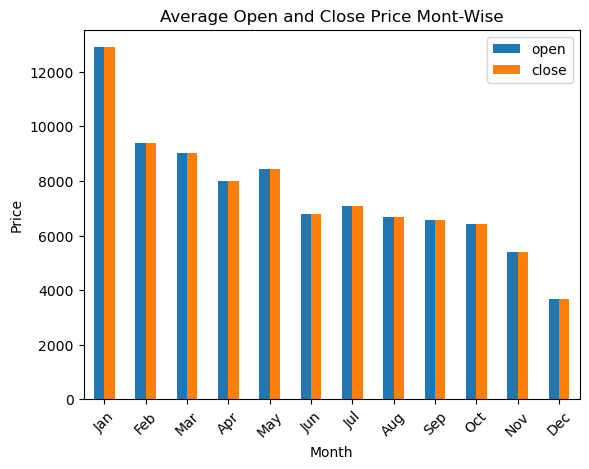

In [21]:
monthly_open_close_data = df_2018.groupby('month')[['open', 'close']].mean()
monthly_open_close_data = monthly_open_close_data.reindex(calendar.month_abbr[1:], axis=0)

monthly_open_close_data.plot(kind='bar')
plt.title("Average Open and Close Price Mont-Wise")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

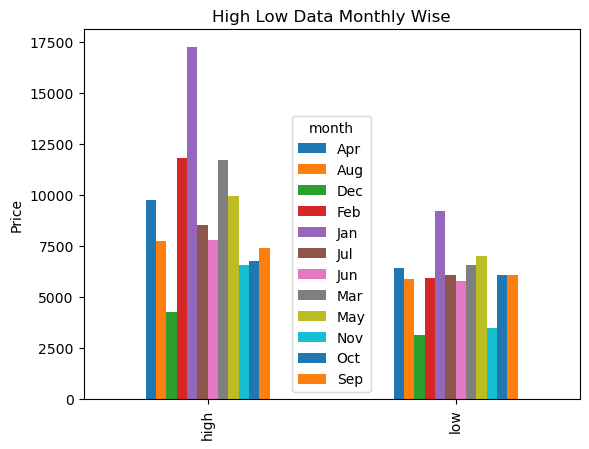

In [22]:
monthly_high_data = df_2018.groupby("month")["high"].max()
montly_low_data = df_2018.groupby("month")["low"].min()
monthly_high_low_data = pd.DataFrame([monthly_high_data, montly_low_data])
monthly_high_low_data.plot(kind="bar")
plt.title("High Low Data Monthly Wise")
plt.ylabel("Price")
plt.show()

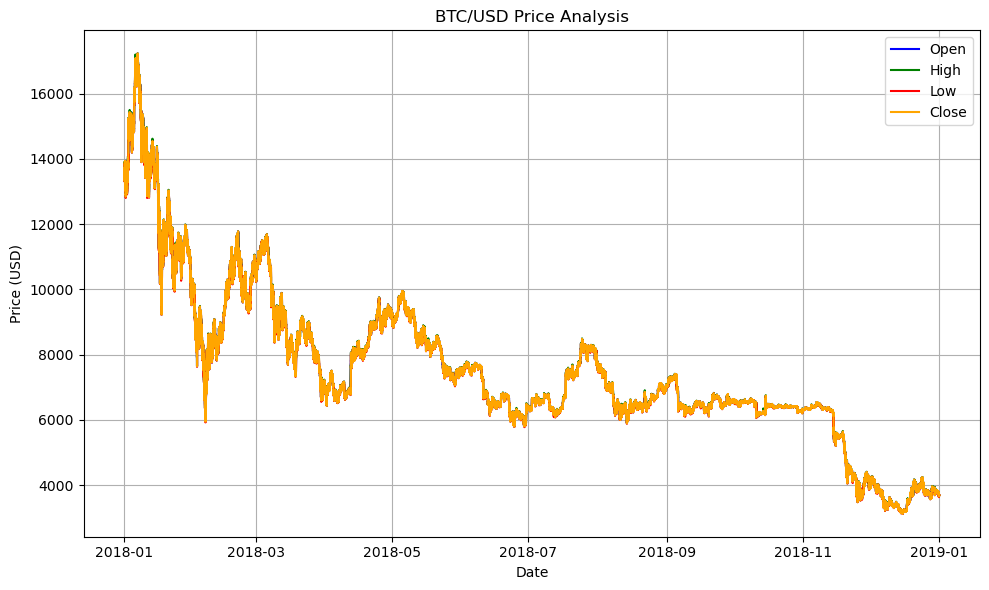

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(df_2018['date'], df_2018['open'], color='blue', label='Open')
plt.plot(df_2018['date'], df_2018['high'], color='green', label='High')
plt.plot(df_2018['date'], df_2018['low'], color='red', label='Low')
plt.plot(df_2018['date'], df_2018['close'], color='orange', label='Close')

plt.title('BTC/USD Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 2019 Analysis

In [24]:
df_2019 = df[(df['date']>="2019-01-01") & (df['date']<'2020-01-01')]
df_2019

,date,symbol,open,high,low,close,Volume BTC,Volume USD
1051198,2019-12-31 23:59:00,BTC/USD,7167.30,7171.22,7167.30,7168.36,0.191448,1372.366393
1051199,2019-12-31 23:58:00,BTC/USD,7166.89,7167.30,7161.99,7167.30,0.568868,4077.245538
1051200,2019-12-31 23:57:00,BTC/USD,7164.22,7170.80,7161.65,7166.89,3.959440,28376.874525
1051201,2019-12-31 23:56:00,BTC/USD,7182.49,7182.49,7170.20,7170.20,6.248892,44805.802550
1051202,2019-12-31 23:55:00,BTC/USD,7175.69,7176.68,7175.69,7176.68,0.016877,121.122623
...,...,...,...,...,...,...,...,...
1576792,2019-01-01 00:05:00,BTC/USD,3690.40,3690.85,3690.40,3690.85,2.247676,8295.834596
1576793,2019-01-01 00:04:00,BTC/USD,3692.35,3692.35,3690.34,3690.34,0.111622,411.923131
1576794,2019-01-01 00:03:00,BTC/USD,3692.85,3692.85,3688.32,3692.35,0.296662,1095.379936
1576795,2019-01-01 00:02:00,BTC/USD,3689.73,3689.73,3686.62,3686.62,0.965966,3561.149575


In [25]:
df_2019["month"] = df_2019['date'].dt.month
df_2019['month'] = df_2019['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df_2019

/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_81679/3096560755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["month"] = df_2019['date'].dt.month
/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_81679/3096560755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['month'] = df_2019['date'].dt.month.apply(lambda x: calendar.month_abbr[x])


,date,symbol,open,high,low,close,Volume BTC,Volume USD,month
1051198,2019-12-31 23:59:00,BTC/USD,7167.30,7171.22,7167.30,7168.36,0.191448,1372.366393,Dec
1051199,2019-12-31 23:58:00,BTC/USD,7166.89,7167.30,7161.99,7167.30,0.568868,4077.245538,Dec
1051200,2019-12-31 23:57:00,BTC/USD,7164.22,7170.80,7161.65,7166.89,3.959440,28376.874525,Dec
1051201,2019-12-31 23:56:00,BTC/USD,7182.49,7182.49,7170.20,7170.20,6.248892,44805.802550,Dec
1051202,2019-12-31 23:55:00,BTC/USD,7175.69,7176.68,7175.69,7176.68,0.016877,121.122623,Dec
...,...,...,...,...,...,...,...,...,...
1576792,2019-01-01 00:05:00,BTC/USD,3690.40,3690.85,3690.40,3690.85,2.247676,8295.834596,Jan
1576793,2019-01-01 00:04:00,BTC/USD,3692.35,3692.35,3690.34,3690.34,0.111622,411.923131,Jan
1576794,2019-01-01 00:03:00,BTC/USD,3692.85,3692.85,3688.32,3692.35,0.296662,1095.379936,Jan
1576795,2019-01-01 00:02:00,BTC/USD,3689.73,3689.73,3686.62,3686.62,0.965966,3561.149575,Jan


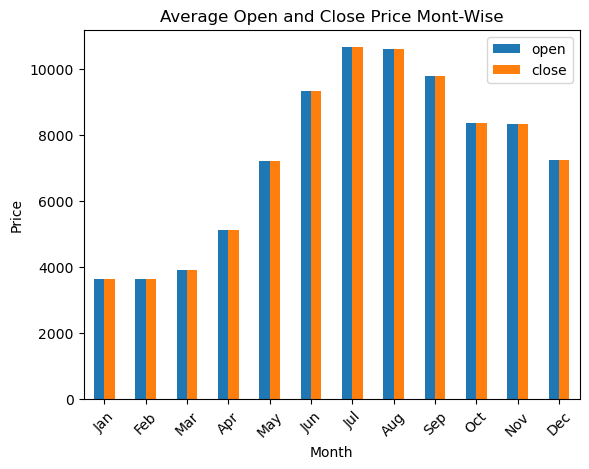

In [26]:
monthly_open_close_data = df_2019.groupby('month')[['open', 'close']].mean()
monthly_open_close_data = monthly_open_close_data.reindex(calendar.month_abbr[1:], axis=0)

monthly_open_close_data.plot(kind='bar')
plt.title("Average Open and Close Price Mont-Wise")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

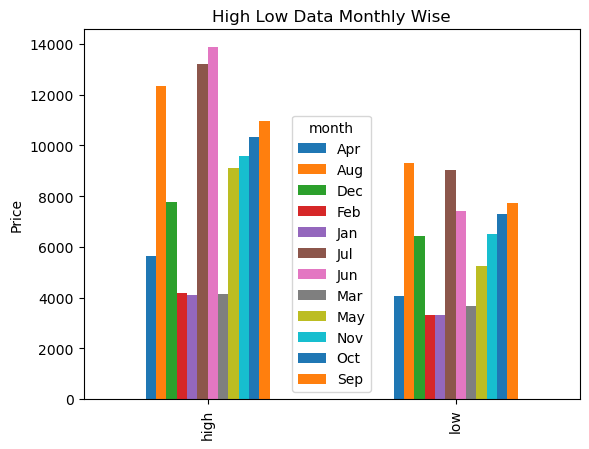

In [27]:
monthly_high_data = df_2019.groupby("month")["high"].max()
montly_low_data = df_2019.groupby("month")["low"].min()
monthly_high_low_data = pd.DataFrame([monthly_high_data, montly_low_data])
monthly_high_low_data.plot(kind="bar")
plt.title("High Low Data Monthly Wise")
plt.ylabel("Price")
plt.show()

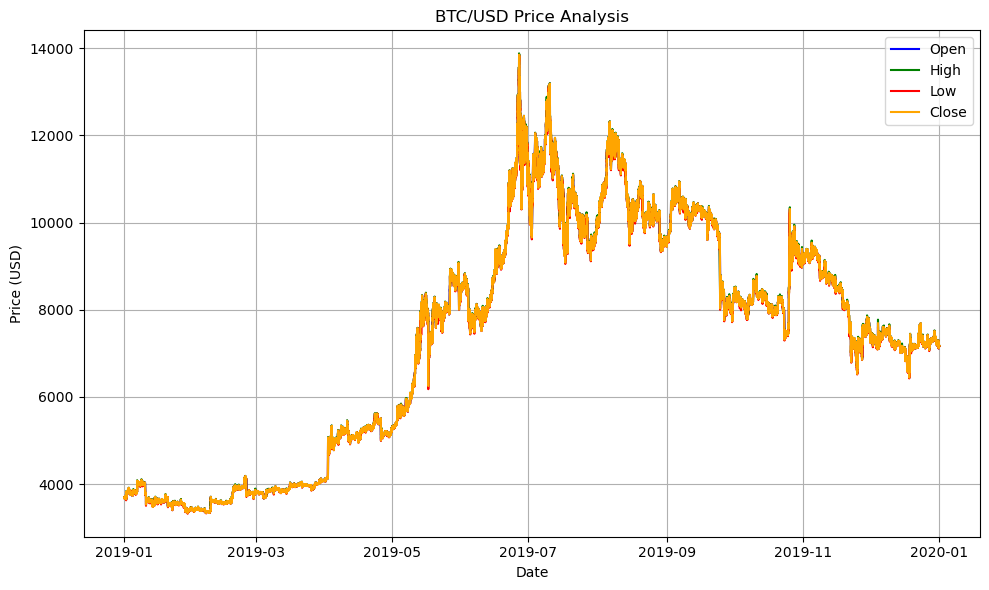

In [28]:
plt.figure(figsize=(10, 6))

plt.plot(df_2019['date'], df_2019['open'], color='blue', label='Open')
plt.plot(df_2019['date'], df_2019['high'], color='green', label='High')
plt.plot(df_2019['date'], df_2019['low'], color='red', label='Low')
plt.plot(df_2019['date'], df_2019['close'], color='orange', label='Close')

plt.title('BTC/USD Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 2020 Analysis

In [29]:
df_2020 = df[(df['date']>="2020-01-01") & (df['date']<'2021-01-01')]
df_2020

,date,symbol,open,high,low,close,Volume BTC,Volume USD
1576797,2020-12-31 23:59:00,BTC/USD,28982.44,29024.59,28969.83,28992.79,5.897679,170990.182941
1576798,2020-12-31 23:58:00,BTC/USD,29044.79,29048.62,29000.12,29000.12,20.362289,590508.837815
1576799,2020-12-31 23:57:00,BTC/USD,29039.53,29048.63,29023.26,29044.79,14.503728,421257.721488
1576800,2020-12-31 23:56:00,BTC/USD,29052.02,29059.42,29039.28,29039.53,2.707583,78626.925850
1576801,2020-12-31 23:55:00,BTC/USD,29036.10,29052.02,29025.78,29052.02,7.631439,221708.705383
...,...,...,...,...,...,...,...,...
2064514,2020-01-01 00:05:00,BTC/USD,7156.52,7159.51,7150.10,7158.50,0.886932,6349.100145
2064515,2020-01-01 00:04:00,BTC/USD,7158.50,7158.50,7154.97,7157.20,0.971387,6952.408961
2064516,2020-01-01 00:03:00,BTC/USD,7158.82,7158.82,7156.90,7156.90,0.065819,471.062506
2064517,2020-01-01 00:02:00,BTC/USD,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359


In [30]:
df_2020["month"] = df_2020['date'].dt.month
df_2020['month'] = df_2020['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df_2020

/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_81679/3425117559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020["month"] = df_2020['date'].dt.month
/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_81679/3425117559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['month'] = df_2020['date'].dt.month.apply(lambda x: calendar.month_abbr[x])


,date,symbol,open,high,low,close,Volume BTC,Volume USD,month
1576797,2020-12-31 23:59:00,BTC/USD,28982.44,29024.59,28969.83,28992.79,5.897679,170990.182941,Dec
1576798,2020-12-31 23:58:00,BTC/USD,29044.79,29048.62,29000.12,29000.12,20.362289,590508.837815,Dec
1576799,2020-12-31 23:57:00,BTC/USD,29039.53,29048.63,29023.26,29044.79,14.503728,421257.721488,Dec
1576800,2020-12-31 23:56:00,BTC/USD,29052.02,29059.42,29039.28,29039.53,2.707583,78626.925850,Dec
1576801,2020-12-31 23:55:00,BTC/USD,29036.10,29052.02,29025.78,29052.02,7.631439,221708.705383,Dec
...,...,...,...,...,...,...,...,...,...
2064514,2020-01-01 00:05:00,BTC/USD,7156.52,7159.51,7150.10,7158.50,0.886932,6349.100145,Jan
2064515,2020-01-01 00:04:00,BTC/USD,7158.50,7158.50,7154.97,7157.20,0.971387,6952.408961,Jan
2064516,2020-01-01 00:03:00,BTC/USD,7158.82,7158.82,7156.90,7156.90,0.065819,471.062506,Jan
2064517,2020-01-01 00:02:00,BTC/USD,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,Jan


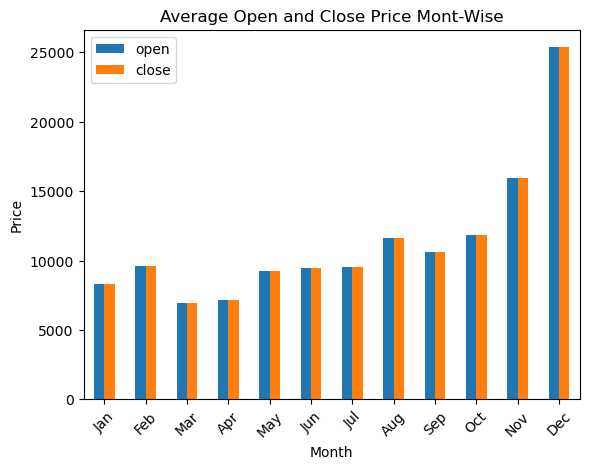

In [31]:
monthly_open_close_data = df_2020.groupby('month')[['open', 'close']].mean()
monthly_open_close_data = monthly_open_close_data.reindex(calendar.month_abbr[1:], axis=0)

monthly_open_close_data.plot(kind='bar')
plt.title("Average Open and Close Price Mont-Wise")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

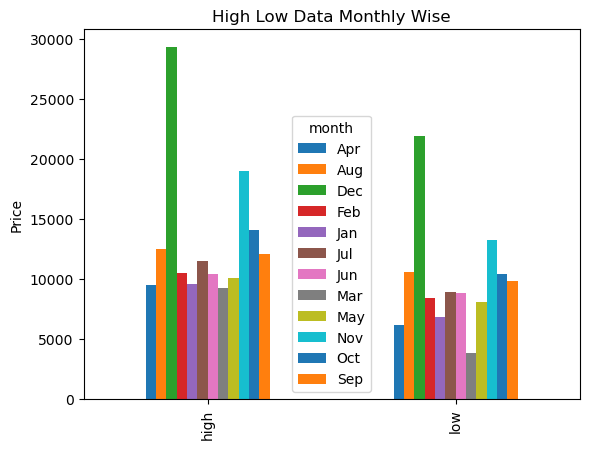

In [32]:
monthly_high_data = df_2020.groupby("month")["high"].max()
montly_low_data = df_2020.groupby("month")["low"].min()
monthly_high_low_data = pd.DataFrame([monthly_high_data, montly_low_data])
monthly_high_low_data.plot(kind="bar")
plt.title("High Low Data Monthly Wise")
plt.ylabel("Price")
plt.show()

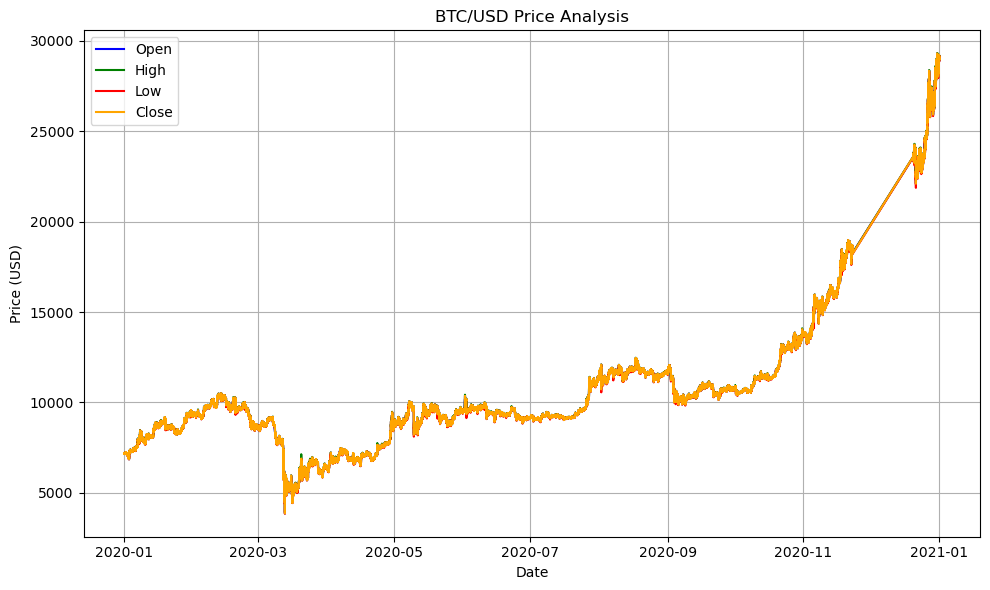

In [33]:
plt.figure(figsize=(10, 6))

plt.plot(df_2020['date'], df_2020['open'], color='blue', label='Open')
plt.plot(df_2020['date'], df_2020['high'], color='green', label='High')
plt.plot(df_2020['date'], df_2020['low'], color='red', label='Low')
plt.plot(df_2020['date'], df_2020['close'], color='orange', label='Close')

plt.title('BTC/USD Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 2021 Analysis

In [34]:
df_2021 = df[(df['date']>="2021-01-01") & (df['date']<'2022-01-01')]
df_2021

,date,symbol,open,high,low,close,Volume BTC,Volume USD
2149702,2021-12-31 23:59:00,BTC/USD,46166.19,46222.44,46166.19,46214.37,2.592459,119808.875611
2149703,2021-12-31 23:58:00,BTC/USD,46232.47,46232.47,46140.00,46175.48,0.711155,32837.917015
2149704,2021-12-31 23:57:00,BTC/USD,46249.35,46251.03,46243.81,46245.17,0.236106,10918.759333
2149705,2021-12-31 23:56:00,BTC/USD,46266.27,46280.56,46249.35,46249.35,0.620450,28695.409207
2149706,2021-12-31 23:55:00,BTC/USD,46271.03,46271.03,46259.35,46259.35,1.349811,62441.372081
...,...,...,...,...,...,...,...,...
2675296,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
2675297,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
2675298,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
2675299,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


In [35]:
df_2021["month"] = df_2021['date'].dt.month
df_2021['month'] = df_2021['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df_2021

/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_81679/814634107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021["month"] = df_2021['date'].dt.month
/var/folders/nl/mq6lrx555337t5yq69ftc0jr0000gn/T/ipykernel_81679/814634107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['month'] = df_2021['date'].dt.month.apply(lambda x: calendar.month_abbr[x])


,date,symbol,open,high,low,close,Volume BTC,Volume USD,month
2149702,2021-12-31 23:59:00,BTC/USD,46166.19,46222.44,46166.19,46214.37,2.592459,119808.875611,Dec
2149703,2021-12-31 23:58:00,BTC/USD,46232.47,46232.47,46140.00,46175.48,0.711155,32837.917015,Dec
2149704,2021-12-31 23:57:00,BTC/USD,46249.35,46251.03,46243.81,46245.17,0.236106,10918.759333,Dec
2149705,2021-12-31 23:56:00,BTC/USD,46266.27,46280.56,46249.35,46249.35,0.620450,28695.409207,Dec
2149706,2021-12-31 23:55:00,BTC/USD,46271.03,46271.03,46259.35,46259.35,1.349811,62441.372081,Dec
...,...,...,...,...,...,...,...,...,...
2675296,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250,Jan
2675297,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434,Jan
2675298,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387,Jan
2675299,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279,Jan


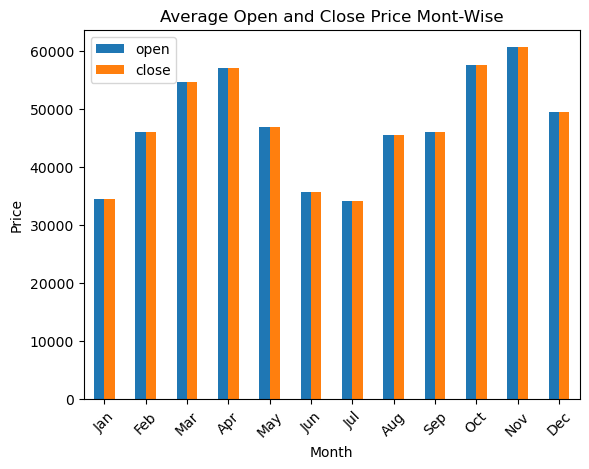

In [36]:
monthly_open_close_data = df_2021.groupby('month')[['open', 'close']].mean()
monthly_open_close_data = monthly_open_close_data.reindex(calendar.month_abbr[1:], axis=0)

monthly_open_close_data.plot(kind='bar')
plt.title("Average Open and Close Price Mont-Wise")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

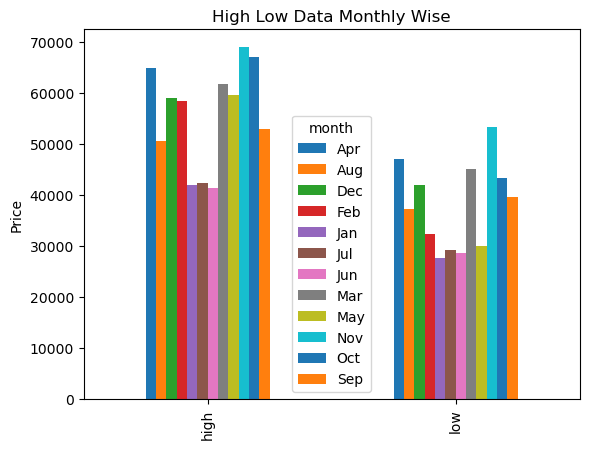

In [37]:
monthly_high_data = df_2021.groupby("month")["high"].max()
montly_low_data = df_2021.groupby("month")["low"].min()
monthly_high_low_data = pd.DataFrame([monthly_high_data, montly_low_data])
monthly_high_low_data.plot(kind="bar")
plt.title("High Low Data Monthly Wise")
plt.ylabel("Price")
plt.show()

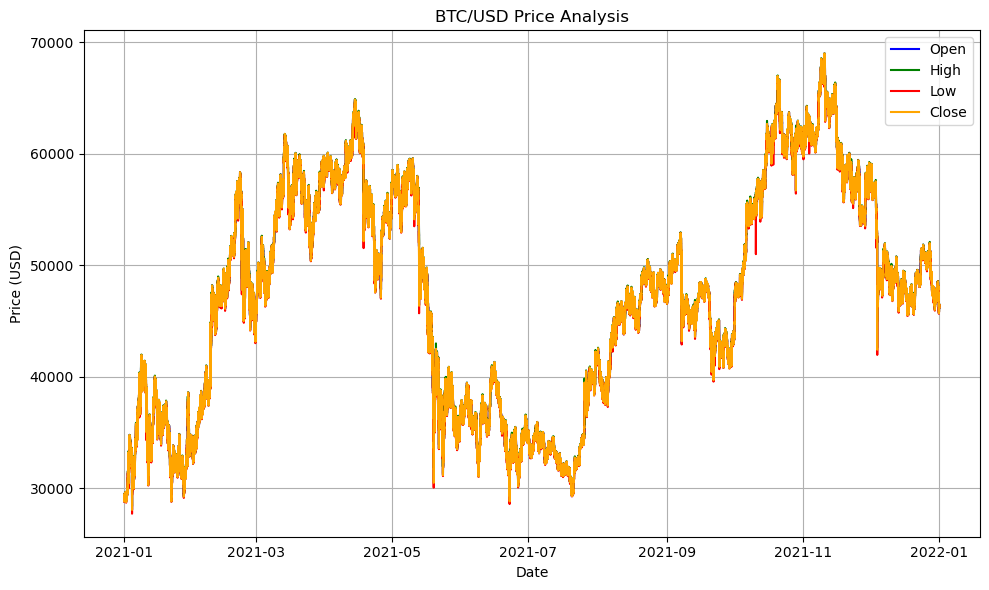

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(df_2021['date'], df_2021['open'], color='blue', label='Open')
plt.plot(df_2021['date'], df_2021['high'], color='green', label='High')
plt.plot(df_2021['date'], df_2021['low'], color='red', label='Low')
plt.plot(df_2021['date'], df_2021['close'], color='orange', label='Close')

plt.title('BTC/USD Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Whole Data Analysis

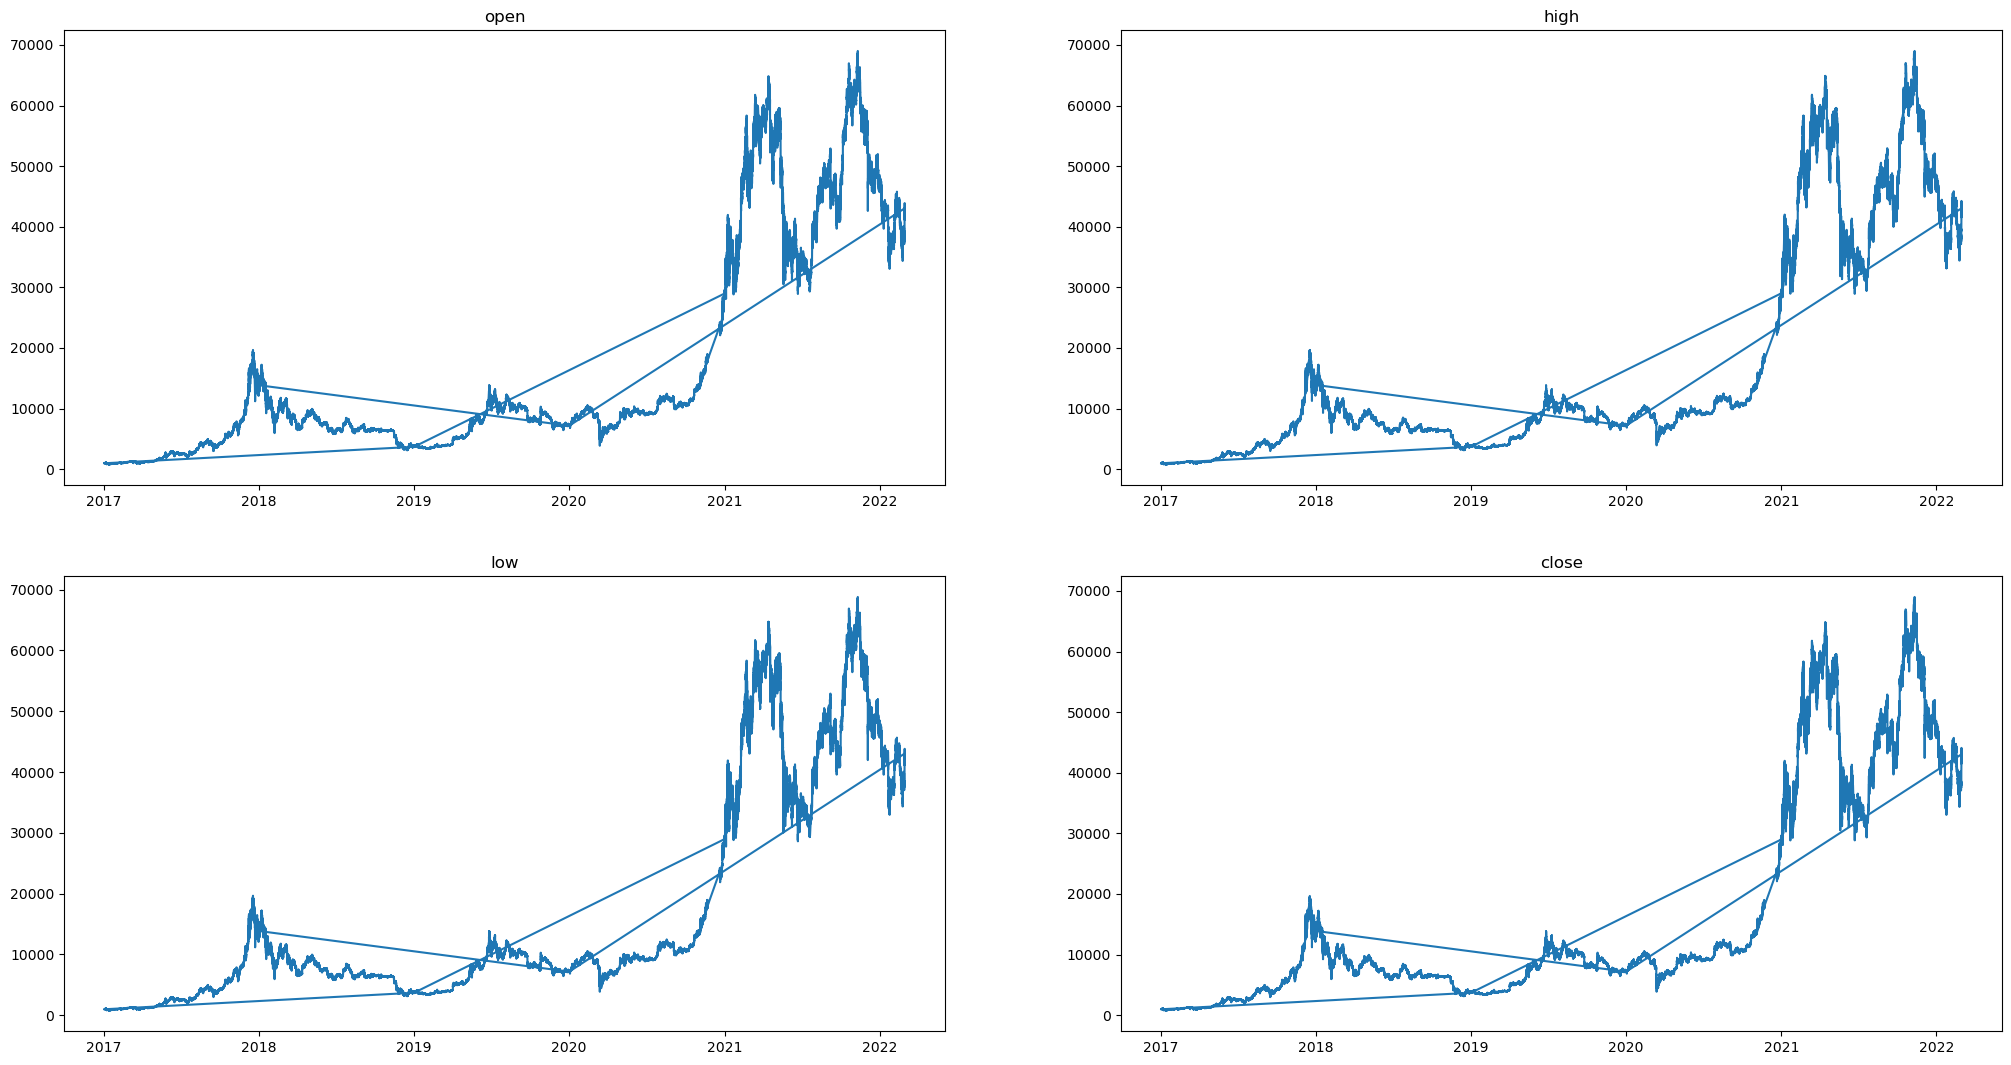

In [39]:
plt.figure(figsize=(25,13))
for index,col in enumerate(['open', 'high', 'low', 'close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['date'],df[col])
    plt.title(col)

In [40]:
df_daily = df.resample("D", on="date").mean(numeric_only=True)
df_daily.head()

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-01-01,977.256602,977.385233,977.132620,977.276060,4.760662,4701.831942
2017-01-02,1012.267604,1012.517181,1011.988826,1012.273903,5.671792,5747.243606
2017-01-03,1020.001535,1020.226840,1019.794437,1020.040472,6.312263,6442.176792
2017-01-04,1076.558840,1077.271167,1075.572542,1076.553639,14.973928,16303.129214
2017-01-05,1043.608646,1044.905549,1042.094125,1043.547951,25.013098,25132.509465


In [41]:
df_daily.isnull().sum()

open          26
high          26
low           26
close         26
Volume BTC    26
Volume USD    26
dtype: int64

In [42]:
df_daily = df_daily.fillna(df_daily.mean())

In [43]:
df_daily.isnull().sum()

open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

<p><b>Split training dataset</p></b>

In [44]:
split_ratio = 0.8
split_index = int(len(df_daily) * split_ratio)
train_data = df_daily[:split_index]
test_data = df_daily[split_index:]

In [45]:
print("Train dataset: ", len(train_data))
print("Test dataset: ", len(test_data))

Train dataset:  1508
Test dataset:  378


<p><b>Scale the data</b></p>

In [46]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data[["close"]])
test_data_scaled = scaler.transform(test_data[["close"]])
train_data_scaled

array([[0.00404277],
       [0.00477091],
       [0.0049325 ],
       ...,
       [0.99482803],
       [0.97954608],
       [1.        ]])

In [47]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(train_data_scaled, axis=-1),
                              np.expand_dims(train_data_scaled, axis=-1),
                              epochs=10, batch_size=1, verbose=0)

lstm_predictions = lstm_model.predict(np.expand_dims(test_data_scaled, axis=-1))

/Users/bikram/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data_scaled, lstm_predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.554415239820789e-05


In [49]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.0039426073096629705
